#### DepMap (full data) DEG analysis based on benefit scores

Supplementary figure 3d

In [1]:
library(dplyr)
library(limma)
library(edgeR)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
exp_data_voom <- read.csv('../data/Expression_string_ppi.csv', header = T,
row.names = 1)
head(exp_data_voom)

,CTAG1A,USP16,FBXO27,PSMC6,RNF215,PGLYRP3,MRPS22,ZNF735,PGBD2,ERAP2,⋯,EXOC5P1,ZNF317,DHX9,CROCC2,CCNG1,YBX1,TMEM17,BCAP29,ZSCAN21,RPS10P16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
127399,10.725482,10.584193,13.508033,10.148792,9.991287,8.211031,10.50869,8.669221,10.489875,8.719983,⋯,8.990858,9.998337,10.477406,9.792913,10.565316,10.289390,10.778289,10.607616,10.600022,8.930965
143B,9.988517,9.873380,12.167203,10.853825,9.339054,8.211031,11.46019,8.669221,10.251736,7.703096,⋯,9.295713,9.881371,10.504871,7.470985,10.690832,10.013303,9.819016,10.410554,10.237587,8.930965
170MGBA,11.862986,11.081086,11.454823,10.949887,10.706711,8.211031,10.86856,8.669221,9.692161,13.947832,⋯,9.547251,10.267350,10.404635,9.792913,10.042473,10.041000,11.834549,12.017006,11.125816,8.193999
22RV1,14.018264,11.151668,10.152104,10.756197,10.747325,8.211031,10.56696,8.669221,11.822973,7.028192,⋯,10.631316,10.745512,11.129092,15.884613,11.236975,10.095626,11.224728,11.554170,10.443876,8.930965
2313287,11.210909,10.807002,9.488416,10.509159,10.451561,12.298493,10.18955,8.669221,11.550568,10.967499,⋯,10.631316,10.875875,10.270505,11.994547,9.386061,9.724608,11.547329,10.792402,9.889829,11.467018
253J,9.988517,9.625689,9.313329,9.583177,11.713174,8.211031,10.03110,8.669221,10.483544,13.425794,⋯,9.426957,10.367064,9.627861,11.377876,10.592568,10.209774,8.868719,9.671641,10.639996,10.515927


In [3]:
depmap_scores <- read.csv(file = '../results/depMap_scores.csv',
    header = TRUE)
head(depmap_scores)

,StrippedCellLineName,OncotreePrimaryDisease,PrimaryOrMetastasis,benefit_score,score_cat
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,NIHOVCAR3,Ovarian Epithelial Tumor,Metastatic,3.0524058,high score
2,HEL,Acute Myeloid Leukemia,Primary,-1.8747971,low score
3,HEL9217,Acute Myeloid Leukemia,,0.9520177,high score
4,LS513,Colorectal Adenocarcinoma,Primary,-8.8417766,low score
5,C2BBE1,Colorectal Adenocarcinoma,Primary,-1.3251349,low score
6,253J,Bladder Urothelial Carcinoma,Metastatic,4.2659591,high score


In [4]:
depmap_scores <- depmap_scores[!duplicated(depmap_scores$StrippedCellLineName), ] # remove duplicates
rownames(depmap_scores) <- depmap_scores$StrippedCellLineName

In [5]:
head(depmap_scores)

,StrippedCellLineName,OncotreePrimaryDisease,PrimaryOrMetastasis,benefit_score,score_cat
,<chr>,<chr>,<chr>,<dbl>,<chr>
NIHOVCAR3,NIHOVCAR3,Ovarian Epithelial Tumor,Metastatic,3.0524058,high score
HEL,HEL,Acute Myeloid Leukemia,Primary,-1.8747971,low score
HEL9217,HEL9217,Acute Myeloid Leukemia,,0.9520177,high score
LS513,LS513,Colorectal Adenocarcinoma,Primary,-8.8417766,low score
C2BBE1,C2BBE1,Colorectal Adenocarcinoma,Primary,-1.3251349,low score
253J,253J,Bladder Urothelial Carcinoma,Metastatic,4.2659591,high score


In [6]:
depmap_scores <- depmap_scores %>%
  mutate(across(where(is.character), as.factor))

# set levels for benefit score - ref level is 'low score'
depmap_scores$score_cat <- relevel(depmap_scores$score_cat, ref = 'low score')

In [7]:
exp_data <- t(exp_data_voom)
exp_data <- exp_data[, rownames(depmap_scores)]
head(exp_data)


,NIHOVCAR3,HEL,HEL9217,LS513,C2BBE1,253J,HCC827,ONCODG1,HS294T,NCIH1581,⋯,MAPACHS77,170MGBA,WM3772F,S462,IS076P,IS076A,MPNST724,UMHACC2A,SKNMM,UPMD1
CTAG1A,10.72548,8.403554,8.403554,9.988517,11.210909,9.988517,8.403554,11.210909,14.075980,8.403554,⋯,8.403554,11.862986,8.403554,8.403554,8.403554,8.403554,8.403554,9.988517,11.862986,8.403554
USP16,10.80580,11.355432,11.979059,10.537219,10.531186,9.625689,10.192774,10.683387,11.311319,10.108659,⋯,9.826924,11.081086,9.391304,10.923558,10.029407,11.127466,10.387049,10.401033,10.471602,10.814559
FBXO27,11.88531,4.359133,4.648639,4.889647,10.679056,9.313329,10.429999,10.490704,9.913721,12.780262,⋯,3.511136,11.454823,9.053394,14.272188,14.022691,15.010284,10.544559,9.708844,10.925610,1.189208
PSMC6,10.66602,9.914620,10.534122,10.220567,11.054256,9.583177,10.516566,10.900843,10.041515,11.331726,⋯,10.863116,10.949887,9.911638,11.317880,10.916240,10.918513,10.238737,10.449334,10.629337,10.133968
RNF215,10.92915,10.005399,8.899522,9.710361,9.191141,11.713174,10.064660,11.370637,11.332396,10.605585,⋯,10.300395,10.706711,10.570237,10.134482,10.020444,11.526681,10.018304,10.834427,11.264964,8.866599
PGLYRP3,11.91147,16.111897,12.117921,10.532959,11.380956,8.211031,9.795993,9.795993,8.211031,8.211031,⋯,8.211031,8.211031,9.795993,8.211031,8.211031,8.211031,8.211031,8.211031,8.211031,8.211031


In [8]:
dim(exp_data)

[1] 24963  1033

In [9]:
keep <- rowMeans(exp_data) > 1  # or use other thresholds
table(keep)

keep
 TRUE 
24963 

In [10]:
depmap_scores$PrimaryOrMetastasis <- relevel(depmap_scores$PrimaryOrMetastasis, ref = 'Primary')

In [11]:
levels(depmap_scores$PrimaryOrMetastasis)

[1] "Primary"    ""           "Metastatic" "Unknown"

In [12]:
levels(depmap_scores$score_cat)

[1] "low score"  "high score"

In [13]:
dim(depmap_scores)

[1] 1033    5

In [14]:
expr <- as.matrix(exp_data)

design_mat <- model.matrix(~  score_cat + OncotreePrimaryDisease + PrimaryOrMetastasis , depmap_scores) 

In [15]:
dim(design_mat)

[1] 1033   78

In [16]:
fit <- lmFit(expr, design_mat)

In [17]:
fit <- eBayes(fit, trend = TRUE)

In [18]:
topTable(fit, coef = "score_cathigh score", number = 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABHD17AP1,-1.1868038,9.794372,-8.914763,2.430173e-18,6.066441e-14,30.81372
PKD1,-0.6763350,10.289345,-8.651398,2.123279e-17,2.377161e-13,28.72451
DAPP1,1.8087993,10.970814,8.614825,2.856821e-17,2.377161e-13,28.43860
FAM156B,-1.0257246,9.975844,-8.459570,9.952015e-17,5.225917e-13,27.23639
YBX1P10,-0.8966831,10.155918,-8.453240,1.046732e-16,5.225917e-13,27.18778
DUSP8P5,-0.7276277,10.308159,-8.399239,1.608129e-16,6.690619e-13,26.77428
RPL7P57,-0.8925989,10.093015,-8.112098,1.517247e-15,5.217310e-12,24.61401
EEF1A1P1,-1.1955425,9.980798,-8.096572,1.709804e-15,5.217310e-12,24.49906
PKD1P6,-0.6073964,10.283666,-8.084154,1.881016e-15,5.217310e-12,24.40725


In [19]:
deg_benefit_scores <- topTable(fit, coef = "score_cathigh score", number = Inf)

In [20]:
head(deg_benefit_scores)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABHD17AP1,-1.1868038,9.794372,-8.914763,2.430173e-18,6.066441e-14,30.81372
PKD1,-0.6763350,10.289345,-8.651398,2.123279e-17,2.377161e-13,28.72451
DAPP1,1.8087993,10.970814,8.614825,2.856821e-17,2.377161e-13,28.43860
FAM156B,-1.0257246,9.975844,-8.459570,9.952015e-17,5.225917e-13,27.23639
YBX1P10,-0.8966831,10.155918,-8.453240,1.046732e-16,5.225917e-13,27.18778
DUSP8P5,-0.7276277,10.308159,-8.399239,1.608129e-16,6.690619e-13,26.77428


In [21]:
tail(deg_benefit_scores)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMGB1P41,-6.473784e-05,9.090192,-5.350964e-04,0.9995732,0.9997734,-6.477162
MIR648,6.878647e-06,9.642089,4.555896e-04,0.9996366,0.9997935,-6.477162
RPL38,-2.190009e-05,10.676792,-4.095111e-04,0.9996733,0.9997935,-6.477162
KDM5D,1.164937e-04,8.734170,3.553741e-04,0.9997165,0.9997966,-6.477163
MIR651,1.845389e-17,10.072989,4.581494e-15,1.0000000,1.0000000,-6.477163
MIR520C,-2.629758e-16,9.074543,-6.465702e-14,1.0000000,1.0000000,-6.477163


In [22]:
write.csv(deg_benefit_scores, '../results/depMap_DEG_benefitScores.csv', row.names = TRUE)

In [23]:
summary(deg_benefit_scores$adj.P.Val)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02036 0.21955 0.32751 0.59765 1.00000 

In [24]:
saveRDS(object = fit,file = '../results/DepMap_DEG_scoreCat_limma_fit.RDS')

In [25]:
# Remove rows with NA values in key columns
df <- deg_benefit_scores %>%
  filter(!is.na(logFC), !is.na(adj.P.Val))
df$gene <- rownames(df)
# Create a column for significance
df <- df %>%
  mutate(
    sig = case_when(
      adj.P.Val < 0.01 & logFC > 1 ~ "Upregulated",
      adj.P.Val < 0.01 & logFC < -1 ~ "Downregulated",
      TRUE ~ "Non-significant"
    )
  )

# Identify top 10 upregulated and downregulated genes
top_up <- df %>%
  filter(sig == "Upregulated") %>%
  top_n(10, logFC)

top_down <- df %>%
  filter(sig == "Downregulated") %>%
  top_n(-10, logFC)

top_genes <- bind_rows(top_up, top_down)


In [26]:
top_genes

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
DAPP1,1.808799,10.970814,8.614825,2.856821e-17,2.377161e-13,28.438601,DAPP1,Upregulated
SCEL,1.823970,11.525079,7.712965,3.078031e-14,4.301871e-11,21.719996,SCEL,Upregulated
IL1RN,1.535848,10.820185,7.156903,1.641485e-12,7.880075e-10,17.903521,IL1RN,Upregulated
FUT3,1.541050,11.712947,7.061750,3.159359e-12,1.314451e-09,17.275996,FUT3,Upregulated
FGFBP1,1.470080,10.754911,6.731513,2.889865e-11,6.384043e-09,15.156908,FGFBP1,Upregulated
TMPRSS13,1.443560,11.164212,6.684604,3.928061e-11,8.037393e-09,14.863352,TMPRSS13,Upregulated
ADGRF4,1.381785,10.533814,6.510848,1.204629e-10,1.738217e-08,13.792282,ADGRF4,Upregulated
IVL,1.425828,10.451283,6.031530,2.317863e-09,1.748061e-07,10.971896,IVL,Upregulated
ZBED2,1.403429,11.251064,5.980094,3.146134e-09,2.199914e-07,10.681055,ZBED2,Upregulated


In [27]:
head(df)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ABHD17AP1,-1.1868038,9.794372,-8.914763,2.430173e-18,6.066441e-14,30.81372,ABHD17AP1,Downregulated
PKD1,-0.6763350,10.289345,-8.651398,2.123279e-17,2.377161e-13,28.72451,PKD1,Non-significant
DAPP1,1.8087993,10.970814,8.614825,2.856821e-17,2.377161e-13,28.43860,DAPP1,Upregulated
FAM156B,-1.0257246,9.975844,-8.459570,9.952015e-17,5.225917e-13,27.23639,FAM156B,Downregulated
YBX1P10,-0.8966831,10.155918,-8.453240,1.046732e-16,5.225917e-13,27.18778,YBX1P10,Non-significant
DUSP8P5,-0.7276277,10.308159,-8.399239,1.608129e-16,6.690619e-13,26.77428,DUSP8P5,Non-significant


In [28]:
gene_weights_df <- read.csv(file = '../data/L40_gene_weights_final.csv',
  header = T, row.names = 1)
head(gene_weights_df)

,EGFR_IC50_weight,EGFR_dep_weight,combined_weight,scaled_combined_weight
,<dbl>,<dbl>,<dbl>,<dbl>
EGFR,0.65030152,0.018889369,0.6691909,1.8942503
KLK7,-0.14697659,0.001042308,-0.1459343,-0.4026497
SLC4A2,0.34447928,-0.008945562,0.3355337,0.9540547
PKMP1,0.23687592,-0.017029715,0.2198462,0.6280647
TINAGL1,0.09955082,0.013835868,0.1133867,0.3280778
CLDN1,0.19877009,-0.003171301,0.1955988,0.5597391


In [29]:
subset_df <- gene_weights_df %>%
  filter(rownames(gene_weights_df) %in% rownames(top_genes))

dim(subset_df)

[1] 7 4

In [30]:
subset_df

,EGFR_IC50_weight,EGFR_dep_weight,combined_weight,scaled_combined_weight
,<dbl>,<dbl>,<dbl>,<dbl>
IL1RN,0.06860844,-0.002949894,0.06565854,0.1935871
LCN2,0.21141897,0.005364160,0.21678313,0.6194334
DAPP1,0.08922596,0.000642841,0.08986880,0.2618079
EPHA5,-0.21701310,-0.008308565,-0.22532167,-0.6263514
FGFBP1,0.64943973,0.010855720,0.66029545,1.8691843
SCEL,0.32599761,0.009285501,0.33528311,0.9533485
TMPRSS13,-0.07831096,0.012217905,-0.06609305,-0.1776691


In [31]:
# Save SVG output (vector, resolution-independent)
# svg("../figures/DepMap_deg_results_new2.svg", width = 8, height = 7, pointsize = 12)

# Ensure gene column exists and is character
df$gene <- as.character(rownames(df))
gene_weights_df$gene <- as.character(rownames(gene_weights_df))
top_genes$gene <- as.character(top_genes$gene)

# Merge gene weights into DEG results
df_plot <- df %>%
  left_join(gene_weights_df, by = "gene") %>%
  mutate(color_score = as.numeric(scaled_combined_weight))  # ensure numeric

In [32]:
top_gene_list <- rownames(top_genes)

In [33]:
head(df_plot)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,sig,EGFR_IC50_weight,EGFR_dep_weight,combined_weight,scaled_combined_weight,color_score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.1868038,9.794372,-8.914763,2.430173e-18,6.066441e-14,30.81372,ABHD17AP1,Downregulated,NA,NA,NA,NA,NA
2,-0.6763350,10.289345,-8.651398,2.123279e-17,2.377161e-13,28.72451,PKD1,Non-significant,NA,NA,NA,NA,NA
3,1.8087993,10.970814,8.614825,2.856821e-17,2.377161e-13,28.43860,DAPP1,Upregulated,0.08922596,0.000642841,0.0898688,0.2618079,0.2618079
4,-1.0257246,9.975844,-8.459570,9.952015e-17,5.225917e-13,27.23639,FAM156B,Downregulated,NA,NA,NA,NA,NA
5,-0.8966831,10.155918,-8.453240,1.046732e-16,5.225917e-13,27.18778,YBX1P10,Non-significant,NA,NA,NA,NA,NA
6,-0.7276277,10.308159,-8.399239,1.608129e-16,6.690619e-13,26.77428,DUSP8P5,Non-significant,NA,NA,NA,NA,NA


In [34]:
df_plot$top_gene <- ifelse(df_plot$gene %in% top_gene_list, df_plot$gene, NA)

In [35]:
library(ggrepel)

Warning message:
“Removed 24943 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


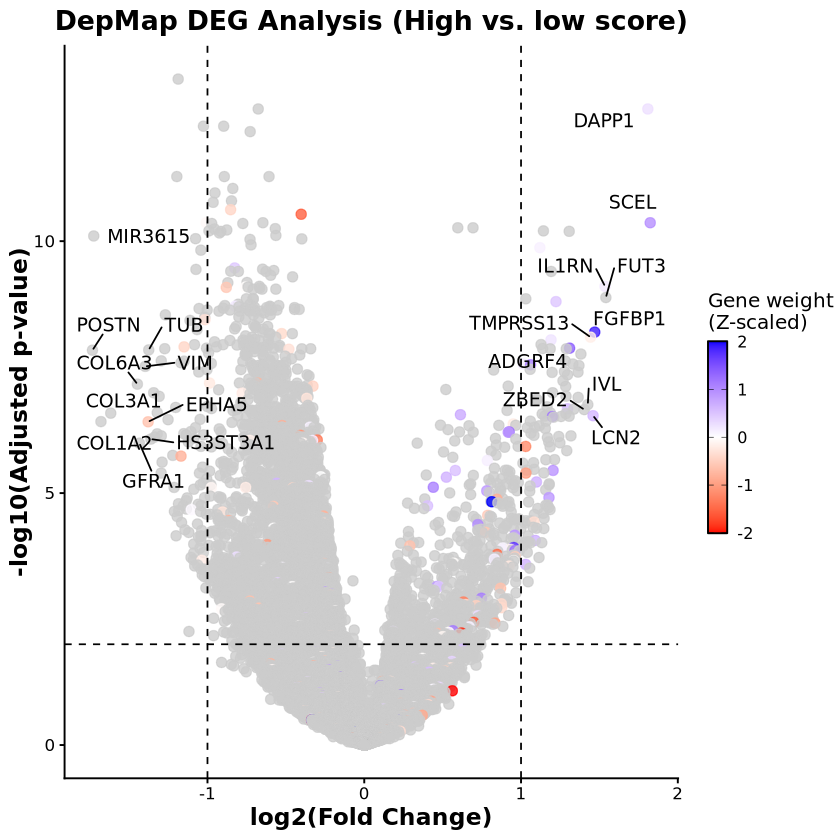

In [36]:
# Volcano plot
# png("../figures/DepMap_scoreCat_DEGs.png", width = 8, height = 7, units = "in", res = 600)
ggplot(df_plot, aes(x = logFC, y = -log10(adj.P.Val))) +
  geom_point(aes(color = color_score), alpha = 0.8, size = 2.5, na.rm = TRUE) +
  scale_color_gradientn(
    colors = c("red", "white", "blue"),
    values = scales::rescale(c(-2, 0, 2)),
    limits = c(-2, 2),
    oob = scales::squish,
    na.value = "grey80",
    name = "Gene weight\n(Z-scaled)",
    guide = guide_colorbar(
      barwidth = 0.8,
      barheight = 8,
      ticks.colour = "black",
      frame.colour = "black"
    )
  ) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "black", linewidth = 0.5) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "black", linewidth = 0.5) +
  geom_text_repel(
    data = df_plot,
    aes(x = logFC, y = -log10(adj.P.Val), label = top_gene),
    size = 4,
    color = "black",
    box.padding = 0.5,
    max.overlaps = 50
  ) +
  labs(
    title = "DepMap DEG Analysis (High vs. low score)",
    x = "log2(Fold Change)",
    y = "-log10(Adjusted p-value)"
  ) +
  theme_classic(base_size = 12) +  # base text size
theme(
  legend.position = "right",
  plot.title = element_text(face = "bold", hjust = 0.5, size = 16),
  axis.title = element_text(face = "bold", size = 14),
  axis.text = element_text(size = 10)
) +
  labs(color = "Gene weight\n(Z-scaled)")  # << add this


In [37]:
# Identify top 10 upregulated and downregulated genes
top_up <- df %>%
  filter(sig == "Upregulated") %>%
  head(100)

top_down <- df %>%
  filter(sig == "Downregulated") %>%
  head(100)

top_genes <- bind_rows(top_up, top_down)
top_gene_list <- rownames(top_genes)

In [38]:
length(top_gene_list)

[1] 200

In [39]:
writeLines(top_gene_list, con = '../results/depMap_topDEG_scoreCat.txt')

Use the above file to query enrichr-KG